# Math Independent Assessment Data Analysis
This notebook provides an analysis of math assessment data to identify top performers and areas for improvement.


The following analysis is a reflection of my own journey of becoming a Data Analyst as I transistion from working in education. Below I will outline what you will be observing and why exactly it is important and how it can help teachers be more proactive by simply collecting data from their students, enjoy! Also feel free to reach out and give me any feedback on how to make an analysis like this better! Thank you.



## Setup and Requirements
This notebook requires the following Python libraries:
- pandas
- plotly

Install the required libraries using:
```python
!pip install pandas plotly


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


## Load Data
Load the assessment data from the provided Excel file.

*All the data and values do not reflect actual performance from these schools*

In [80]:
# Load Data
file_path = 'file:///C:/Users/Patrick/Documents/2nd%20Grade%20Data%20Analysis/ALL%20CLASS%20AVERAGES%20FINAL%20DOCUMENT%20ANON.xlsx'
excel_data = pd.ExcelFile(file_path)

# Display sheet names

print(excel_data.sheet_names)

# Load data from each sheet
math_ia_1 = pd.read_excel(file_path, sheet_name='Math IA 1')
math_ia_2 = pd.read_excel(file_path, sheet_name='Math IA 2')
math_ia_3 = pd.read_excel(file_path, sheet_name='Math IA 3')
math_standards = pd.read_excel(file_path, sheet_name='Math Standards')


['Math IA 1', 'Math IA 2', 'Math IA 3', 'Math Standards']


# Combine Data and Convert Test Scores to Percentages
### All data was cleaned and organized in excel prior to loading it into python and captures the score of over 600 students.
### The data was split into 3 separate sheets that all represent the different math assesments that were taken throughout the year.

In [81]:
# Combine Data
combined_df = pd.concat([math_ia_1, math_ia_2, math_ia_3], ignore_index=True)

#Convert Scores to Percentages
def convert_to_percentage(df):
    # Assuming all columns except the first few (like 'Student', 'School', etc.) are scores
    score_columns = [col for col in df.columns if 'CCSS.Math.Content' in col]
    df[score_columns] = df[score_columns] * 100
    return df

math_ia_1 = convert_to_percentage(math_ia_1)
math_ia_2 = convert_to_percentage(math_ia_2)
math_ia_3 = convert_to_percentage(math_ia_3)



# Verify the combined data looks good by displaying the first few rows of each sheet
### Math Assesment 1

In [82]:
math_ia_1.head()

,Student,School,Student Class,Student Score,CCSS.Math.Content.1.OA,CCSS.Math.Content.1.OA.B.3,CCSS.Math.Content.1.OA.C.6,CCSS.Math.Content.2.NBT,CCSS.Math.Content.2.NBT.1,CCSS.Math.Content.2.NBT.B.5,CCSS.Math.Content.2.OA,CCSS.Math.Content.2.OA.A.1,CCSS.Math.Content.2.OA.B.2,Liberty Class Average,Alexander Street Class Average,Fairmount Class Average,Vailsburg Class Average,Lincolon Park Class Average,Westside Park Class Average,Liberty Class Average 23-24,Alexander Street Class Average 23-24,Fairmount Class Average 23-24,Vailsburg Class Average 23-24,Lincolon Park Class Average 23-24,Westside Park Class Average 23-24
0,Adam Mitchell,Liberty,UPENN,1.00,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.881585,0.806667,0.784699,0.842717,0.847582,0.867946,0.84096,0.789239,0.72437,0.810896,0.808298,0.862706
1,Gavin Wood,Liberty,UPENN,0.96,100.0,100.0,100.0,100.0,100.0,100.0,90.0,100.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sophia Scott,Liberty,UPENN,0.96,100.0,100.0,100.0,89.0,80.0,100.0,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cameron Sanchez,Liberty,UPENN,1.00,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sophia Edwards,Liberty,UPENN,0.92,100.0,100.0,100.0,89.0,80.0,100.0,90.0,100.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Math Assesment 2

In [83]:
math_ia_2.head()

,Student,School,Student Class,Student Score,CCSS.Math.Content.2.NBT,CCSS.Math.Content.2.NBT.A.1,CCSS.Math.Content.2.NBT.A.2,CCSS.Math.Content.2.NBT.A.3,CCSS.Math.Content.2.NBT.A.4,CCSS.Math.Content.2.NBT.B.5,CCSS.Math.Content.2.NBT.B.7,CCSS.Math.Content.2.NBT.B.9,CCSS.Math.Content.2.OA,CCSS.Math.Content.2.OA.A.1,CCSS.Math.Content.2.OA.B.2,Liberty Class Average,Alexander Street Class Average,Fairmount Class Average,Vailsburg Class Average,Lincolon Park Class Average,Westside Park Class Average
0,Adam Mitchell,Liberty,UPENN,0.87,82.0,100.0,100,75.0,75.0,80.0,83.0,50.0,90.0,88.0,100.0,0.785882,0.770824,0.65253,0.822717,0.77809,0.834239
1,Gavin Wood,Liberty,UPENN,0.83,82.0,50.0,0,100.0,50.0,100.0,100.0,100.0,70.0,63.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Sophia Scott,Liberty,UPENN,0.90,95.0,100.0,100,100.0,75.0,100.0,100.0,100.0,70.0,63.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Cameron Sanchez,Liberty,UPENN,0.97,95.0,100.0,100,100.0,100.0,80.0,100.0,50.0,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Sophia Edwards,Liberty,UPENN,0.73,77.0,100.0,0,100.0,50.0,60.0,100.0,0.0,50.0,63.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


### Math Assesment 3

In [84]:
math_ia_3.head()

,Student,School,Student Class,Student Score,CCSS.Math.Content.2.G,CCSS.Math.Content.2.G.A.1,CCSS.Math.Content.2.G.A.2,CCSS.Math.Content.2.G.A.3,CCSS.Math.Content.2.MD,CCSS.Math.Content.2.MD.A.1,CCSS.Math.Content.2.MD.A.2,CCSS.Math.Content.2.MD.A.4,CCSS.Math.Content.2.MD.B.6,CCSS.Math.Content.2.NBT,CCSS.Math.Content.2.NBT.A.1,CCSS.Math.Content.2.NBT.A.2,CCSS.Math.Content.2.NBT.A.3,CCSS.Math.Content.2.NBT.A.4,CCSS.Math.Content.2.NBT.B.5,CCSS.Math.Content.2.NBT.B.7,CCSS.Math.Content.2.OA,CCSS.Math.Content.2.OA.A.1,CCSS.Math.Content.2.OA.B.2,CCSS.Math.Content.2.OA.C.4,Liberty Class Average,Alexander Street Class Average,Fairmount Class Average,Vailsburg Class Average,Lincolon Park Class Average,Westside Park Class Average
0,Adam Mitchell,Liberty,UPENN,1.00,100.0,100.0,100,100,100.0,100,100.0,100.0,100.0,100.0,100.0,100.0,100,100,100.0,100.0,100.0,100.0,100.0,100.0,0.855412,0.790227,0.735882,0.767253,0.799222,0.885934
1,Gavin Wood,Liberty,UPENN,0.90,100.0,100.0,100,100,78.0,100,0.0,100.0,100.0,100.0,100.0,100.0,100,100,100.0,100.0,86.0,88.0,50.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Sophia Scott,Liberty,UPENN,1.00,100.0,100.0,100,100,100.0,100,100.0,100.0,100.0,100.0,100.0,100.0,100,100,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Cameron Sanchez,Liberty,UPENN,1.00,100.0,100.0,100,100,100.0,100,100.0,100.0,100.0,100.0,100.0,100.0,100,100,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Sophia Edwards,Liberty,UPENN,0.86,100.0,100.0,100,100,89.0,100,50.0,100.0,100.0,87.0,100.0,75.0,100,100,100.0,80.0,79.0,88.0,0.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN


# Combine and Save Modified Data

In [85]:

# Combine the data 
combined_df = pd.concat([math_ia_1, math_ia_2, math_ia_3], ignore_index=True)

# Save the modified data back to a new Excel file
combined_df.to_excel('modified_percentages.xlsx', index=False)


# Calculate the average score for each standard
Each standard represents a skill students need to master throughout the curriculum


In [86]:

# Calculate the average score 
standard_columns = [col for col in combined_df.columns if 'CCSS.Math.Content' in col]
average_scores = combined_df[standard_columns].mean().reset_index()
average_scores.columns = ['Standard', 'Average Score']


# Visualize Data using Matplotlib
Identify best and worst performing standards to know which skills students need help with

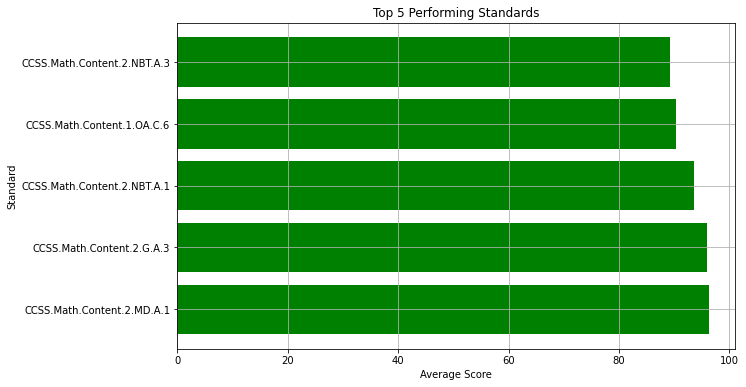

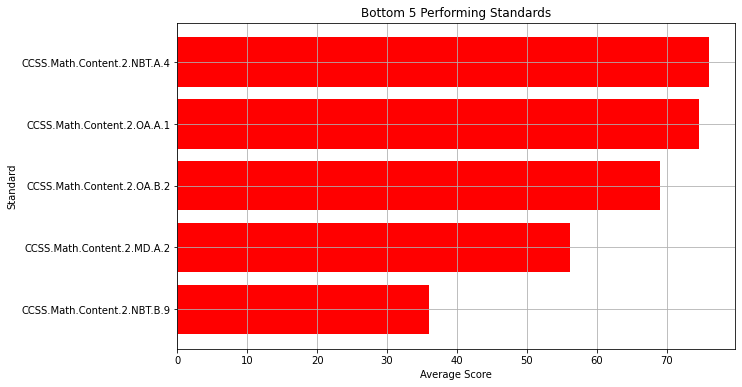

In [87]:

# Identify best and worst performing standards
best_standards = average_scores.nlargest(5, 'Average Score')
worst_standards = average_scores.nsmallest(5, 'Average Score')

# Horizontal bar chart for best performing standards
plt.figure(figsize=(10, 6))
plt.barh(best_standards['Standard'], best_standards['Average Score'], color='green')
plt.title('Top 5 Performing Standards')
plt.xlabel('Average Score')
plt.ylabel('Standard')
plt.grid(True)
plt.show()

# Horizontal bar chart for worst performing standards
plt.figure(figsize=(10, 6))
plt.barh(worst_standards['Standard'], worst_standards['Average Score'], color='red')
plt.title('Bottom 5 Performing Standards')
plt.xlabel('Average Score')
plt.ylabel('Standard')
plt.grid(True)
plt.show()


#### Here we can see that students performed best with Standard 2.MD.A.1 and performed worst with standards 2.NBT.B.9 and 2.MD.A.2
##### Definitions for both standards can be found below

In [88]:
# Set display options to ensure all text is shown
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_colwidth', None)  # Display full text in columns
pd.set_option('display.max_rows', None)  # Display all rows
lowest_standards = math_standards[['CCSS.Math 2.NBT.B.9', 'CCSS.Math.2.MD.A.2']]
print(lowest_standards)

                                                                                         CCSS.Math 2.NBT.B.9  \
0  Explain why addition and subtraction strategies work, using place value and the properties of operations.   

                                                                                                                                                                  CCSS.Math.2.MD.A.2  
0  Measure the length of an object twice, using length units of different lengths for the two measurements; describe how the two measurements relate to the size of the unit chosen.  


#### Given that this data is from all of the math assesments this year, this data will help teachers welcoming this cohort NEXT year with a clear idea of where to anticipate gaps in student learning!

# Calculate Average Scores of Students by School
Identify best and worst performing students and their respective campus

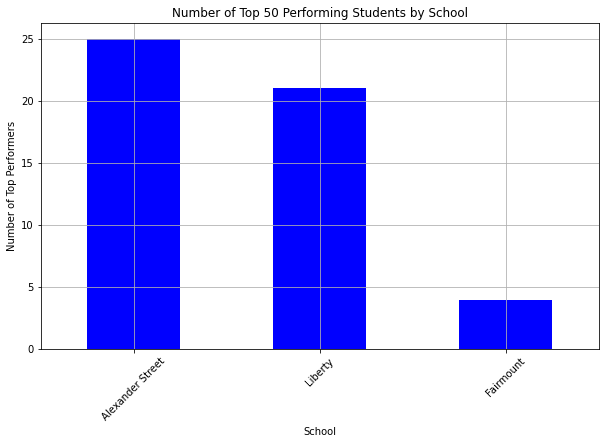

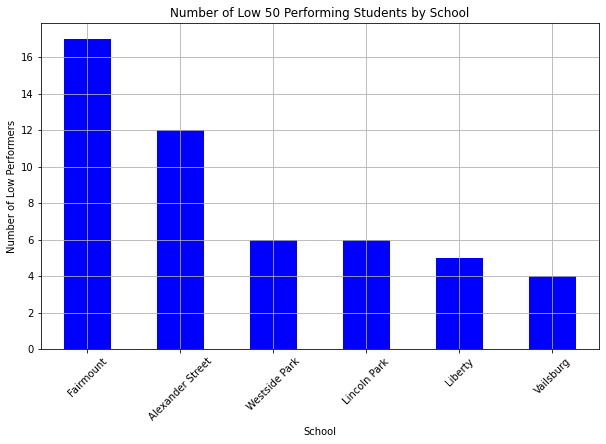

In [89]:


# Calculate the average score for each student across all curriculum standards
score_columns = [col for col in combined_df.columns if 'CCSS.Math.Content' in col]
combined_df['Average Score'] = combined_df[score_columns].mean(axis=1)

# Identify Top Performers
# Identify the top 50 performing students
top_50_students = combined_df.nlargest(50, 'Average Score')

# Group by School
# Determine which school has the most top-performing students
top_50_by_school = top_50_students['School'].value_counts()

# Visualize the Results
# Bar chart for top-performing schools
plt.figure(figsize=(10, 6))
top_50_by_school.plot(kind='bar', color='blue')
plt.title('Number of Top 50 Performing Students by School')
plt.xlabel('School')
plt.ylabel('Number of Top Performers')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Identify Low Performers
# Identify the lowest 50 performing students
top_50_students = combined_df.nsmallest(50, 'Average Score')

# Group by School
# Determine which school has the most top-performing students
top_50_by_school = top_50_students['School'].value_counts()

# Visualize the Results
# Bar chart for top-performing schools
plt.figure(figsize=(10, 6))
top_50_by_school.plot(kind='bar', color='blue')
plt.title('Number of Low 50 Performing Students by School')
plt.xlabel('School')
plt.ylabel('Number of Low Performers')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



### Summary
#### Here we can get an idea of where our stronger cohorts are and where our weaker ones are
#### Leadership can take this information to formulate support plans to best help teachers at these schools close gaps in student learning

# Calculate School Averages Over Time


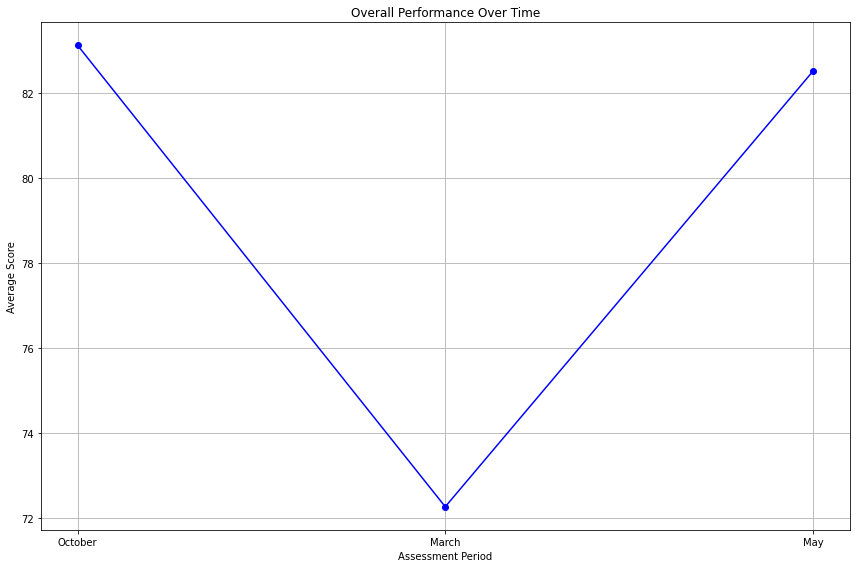

In [90]:
# Add a column to identify the assessment period
math_ia_1['Period'] = 'October'
math_ia_2['Period'] = 'March'
math_ia_3['Period'] = 'May'

# Combine the data into a single DataFrame
combined_df = pd.concat([math_ia_1, math_ia_2, math_ia_3], ignore_index=True)

# Ensure the Period column is treated as a categorical variable with a specific order
combined_df['Period'] = pd.Categorical(combined_df['Period'], categories=['October', 'March', 'May'], ordered=True)

# Calculate Average Scores
# Calculate the average score for each class across all curriculum standards
score_columns = [col for col in combined_df.columns if 'CCSS.Math.Content' in col]
combined_df['Average Score'] = combined_df[score_columns].mean(axis=1)

# Group by period to get the average performance over time
overall_performance = combined_df.groupby('Period')['Average Score'].mean().reset_index()

# Create a Plot for Overall Performance
plt.figure(figsize=(12, 8))
plt.plot(overall_performance['Period'], overall_performance['Average Score'], marker='o', linestyle='-', color='b')
plt.title('Overall Performance Over Time')
plt.xlabel('Assessment Period')
plt.ylabel('Average Score')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1728x1152 with 0 Axes>

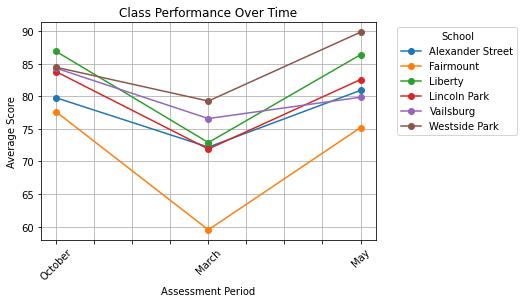

In [91]:

# Calculate Average Scores for Each School Over Time
school_performance = combined_df.groupby(['School', 'Period'])['Average Score'].mean().reset_index()

# Pivot the data for plotting
school_performance_pivot = school_performance.pivot(index='Period', columns='School', values='Average Score')

#  Create a Plot for Each School's Performance Over Time
plt.figure(figsize=(24, 16))
school_performance_pivot.plot(kind='line', marker='o')
plt.title('Class Performance Over Time')
plt.xlabel('Assessment Period')
plt.ylabel('Average Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='School', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Results and Conclusions
In conclusion this data analysis was done to not only showcase my skills of python but to also highliught how this type of study can be useful to educators everywhere. Data gives us a glimpse at where we can improve. Now the teachers who will have these students next year can see where they were struggling this year. They will be able to anticipate gaps, create lesson plans for specific standards and students alike and cultivater a proactive classrom. One that will continuiously build on the efforts of their teachers and students alike.